# 연속확률 분포

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
import numpy as np

if os.name == 'nt': 
    font_family = 'Malgun Gothic'
else: #Mac
    font_family = 'AppleGothic'
sns.set(font = font_family, rc = {"axes.unicode_minus" : False}) 

In [2]:
# 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale = 10)

In [3]:
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
s_x = np.linspace(-10,150,2000)

# 확률밀도함수
s_pdf = norm.pdf(s_x)

# 확률 밀도함수 계산
# mu = 70
# sigma = 10
# s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma **2)) * np.exp(-(s_x - mu) **2 / (2 * sigam **2))


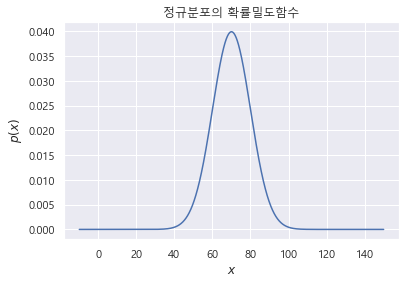

In [4]:
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel("$x$")
plt.ylabel('$p(x)$')
plt.show()

In [5]:
# 누적분포함수
s_cdf = norm.cdf(s_x)

# 누적분포함수 계산
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x - mu) / (np.sqrt(2 * sigma **2))))

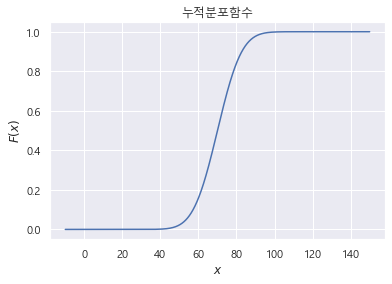

In [6]:
plt.plot(s_x, s_cdf)
plt.title('누적분포함수')
plt.xlabel("$x$")
plt.ylabel('$F(x)$')
plt.show()

In [7]:
# 기대값이 0 이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc=0,scale =1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
sn_x = np.linspace(-5,5,1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

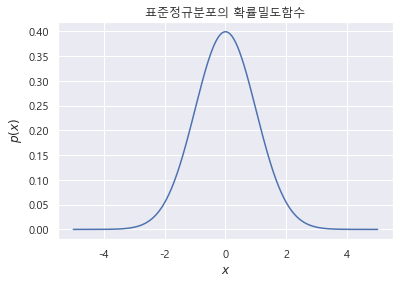

In [8]:
plt.plot(sn_x, sn_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel("$x$")
plt.ylabel('$p(x)$')
plt.show()

In [9]:
# 랜덤 데이터 생성
n_data = np.random.randint(1,100,size=1000)
n_data = np.sort(n_data)


In [10]:
n_data.shape

(1000,)

In [11]:
# n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 51.114
standard deviation: 28.104572652862025


In [12]:
# 확률밀도함수
norm_n_data = stats.norm(loc =n_mean ,scale = n_std)
n_pdf = norm_n_data.pdf(n_data)

In [13]:
n_data.shape

(1000,)

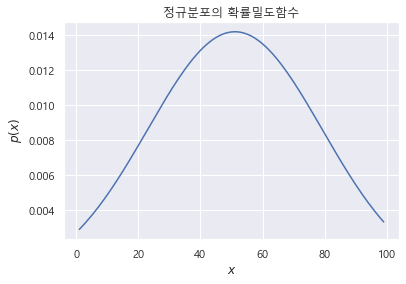

In [14]:
plt.plot(n_data, n_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel("$x$")
plt.ylabel('$p(x)$')
plt.show()

In [15]:
# 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [16]:
# 표준정규분포 확률밀도함수
norm_z_data =  stats.norm(loc=0,scale =1)
z_pdf = norm_z_data.pdf(z_data_list)

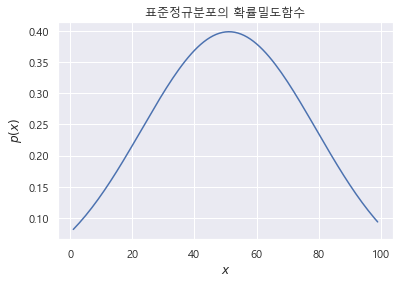

In [17]:
plt.plot(z_data, z_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel("$x$")
plt.ylabel('$p(x)$')
plt.show()

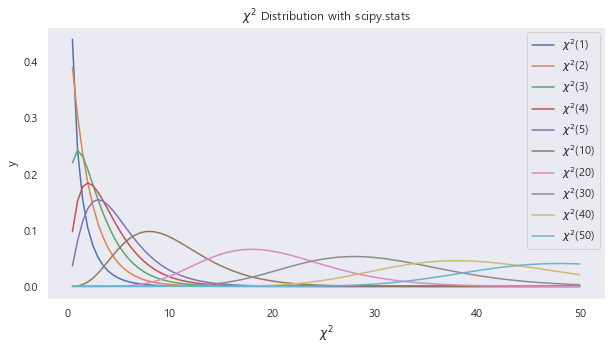

In [18]:
# 카이제곱분포 표현
from scipy.stats import chi2

# 라인스페이스 x축 설정
Chi_X = np.linspace(0.5,50,100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10,5)) # 플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label = r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [19]:
# 카이제곱분포를 이용한 적합성 검정
# 한개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구지역에서 판매
# 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324,78,261]
# 기대도수
x_e = [371,80,212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o,x_e],
                          columns=['서울','인천','대구'],
                          index = ['관찰도수','기대도수'])

In [20]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [21]:
# 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o,f_exp=x_e)
# p_value가 0.0001725로 유의수준 0.05보다 작으므로 
# 귀무가설을 기각하고,
# 대립가설을 지지한다
# 즉, 관찰빈도와 기대빈도는 다르다.

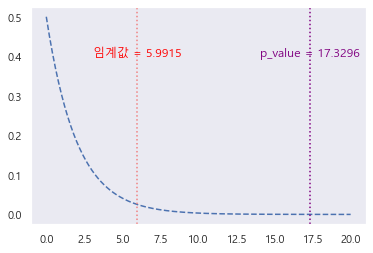

In [22]:
dof = 2 # 자유도
x_chi_l = np.linspace(0,20,201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x_95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi,'b--')

# 95%의 임계값 표시
plt.axvline(x=x_95_c,color='lightcoral',linestyle= ':')
plt.text(x_95_c, .4, '임계값 = ' + str(round(x_95_c, 4)),
         horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x=result[0],color='purple',linestyle= ':')
plt.text(result[0], .4, 'p_value = ' + str(round(result[0], 4)),
         horizontalalignment = 'center', color = 'purple')

plt.grid()
plt.show()